### **TP FINAL**
Micaela Kenigsberg, Gal Rubel y Sophia Grino

Nuestra IA va a resolver un gran problema: ¿Te pareces más a Tom o a Jerry?
Para eso agarramos una base de datos de más de XXXX imágenes etiquetadas como "Tom" o como "Jerry" y mediante el entrenamiento de una IA, nuestro modelo va a ser capas de recibir una foto e identiciar a cuál de los dos personajes se parece más.

## Librerías


In [5]:
!pip install keras-visualizer
!pip install streamlit

ERROR: Operation cancelled by user


In [6]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.regularizers import l2
import numpy as np
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras_visualizer import visualizer
from tensorflow.keras.utils import plot_model
from PIL import Image
from tensorflow.keras.preprocessing import image
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
validation = image_dataset_from_directory(
    directory = '/content/drive/MyDrive/tom_and_jerry/tom_and_jerry/',
    labels='inferred',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=321,
    validation_split=0.2,
    subset='validation',
)
training = image_dataset_from_directory(
    directory = '/content/drive/MyDrive/tom_and_jerry/tom_and_jerry/',
    labels='inferred',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=321,
    validation_split=0.2,
    subset='training',
)



Found 3190 files belonging to 2 classes.
Using 638 files for validation.
Found 3190 files belonging to 2 classes.
Using 2552 files for training.


# Código


In [8]:
model =keras.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

In [9]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(training, epochs=10,
                    validation_data=(validation))

Epoch 1/10
80/80 [==============================] - 504s 6s/step - loss: 15.8695 - accuracy: 0.6701 - val_loss: 0.5870 - val_accuracy: 0.6928
Epoch 2/10
80/80 [==============================] - 400s 5s/step - loss: 0.4330 - accuracy: 0.8025 - val_loss: 0.4438 - val_accuracy: 0.7868
Epoch 3/10
80/80 [==============================] - 393s 5s/step - loss: 0.3152 - accuracy: 0.8652 - val_loss: 0.3311 - val_accuracy: 0.8668
Epoch 4/10
80/80 [==============================] - 380s 5s/step - loss: 0.1705 - accuracy: 0.9330 - val_loss: 0.2971 - val_accuracy: 0.8918
Epoch 5/10
80/80 [==============================] - 384s 5s/step - loss: 0.0998 - accuracy: 0.9655 - val_loss: 0.3020 - val_accuracy: 0.8871
Epoch 6/10
80/80 [==============================] - 382s 5s/step - loss: 0.0659 - accuracy: 0.9784 - val_loss: 0.5639 - val_accuracy: 0.8730
Epoch 7/10
80/80 [==============================] - 387s 5s/step - loss: 0.0894 - accuracy: 0.9714 - val_loss: 0.4063 - val_accuracy: 0.9075
Epoch 8/10
8

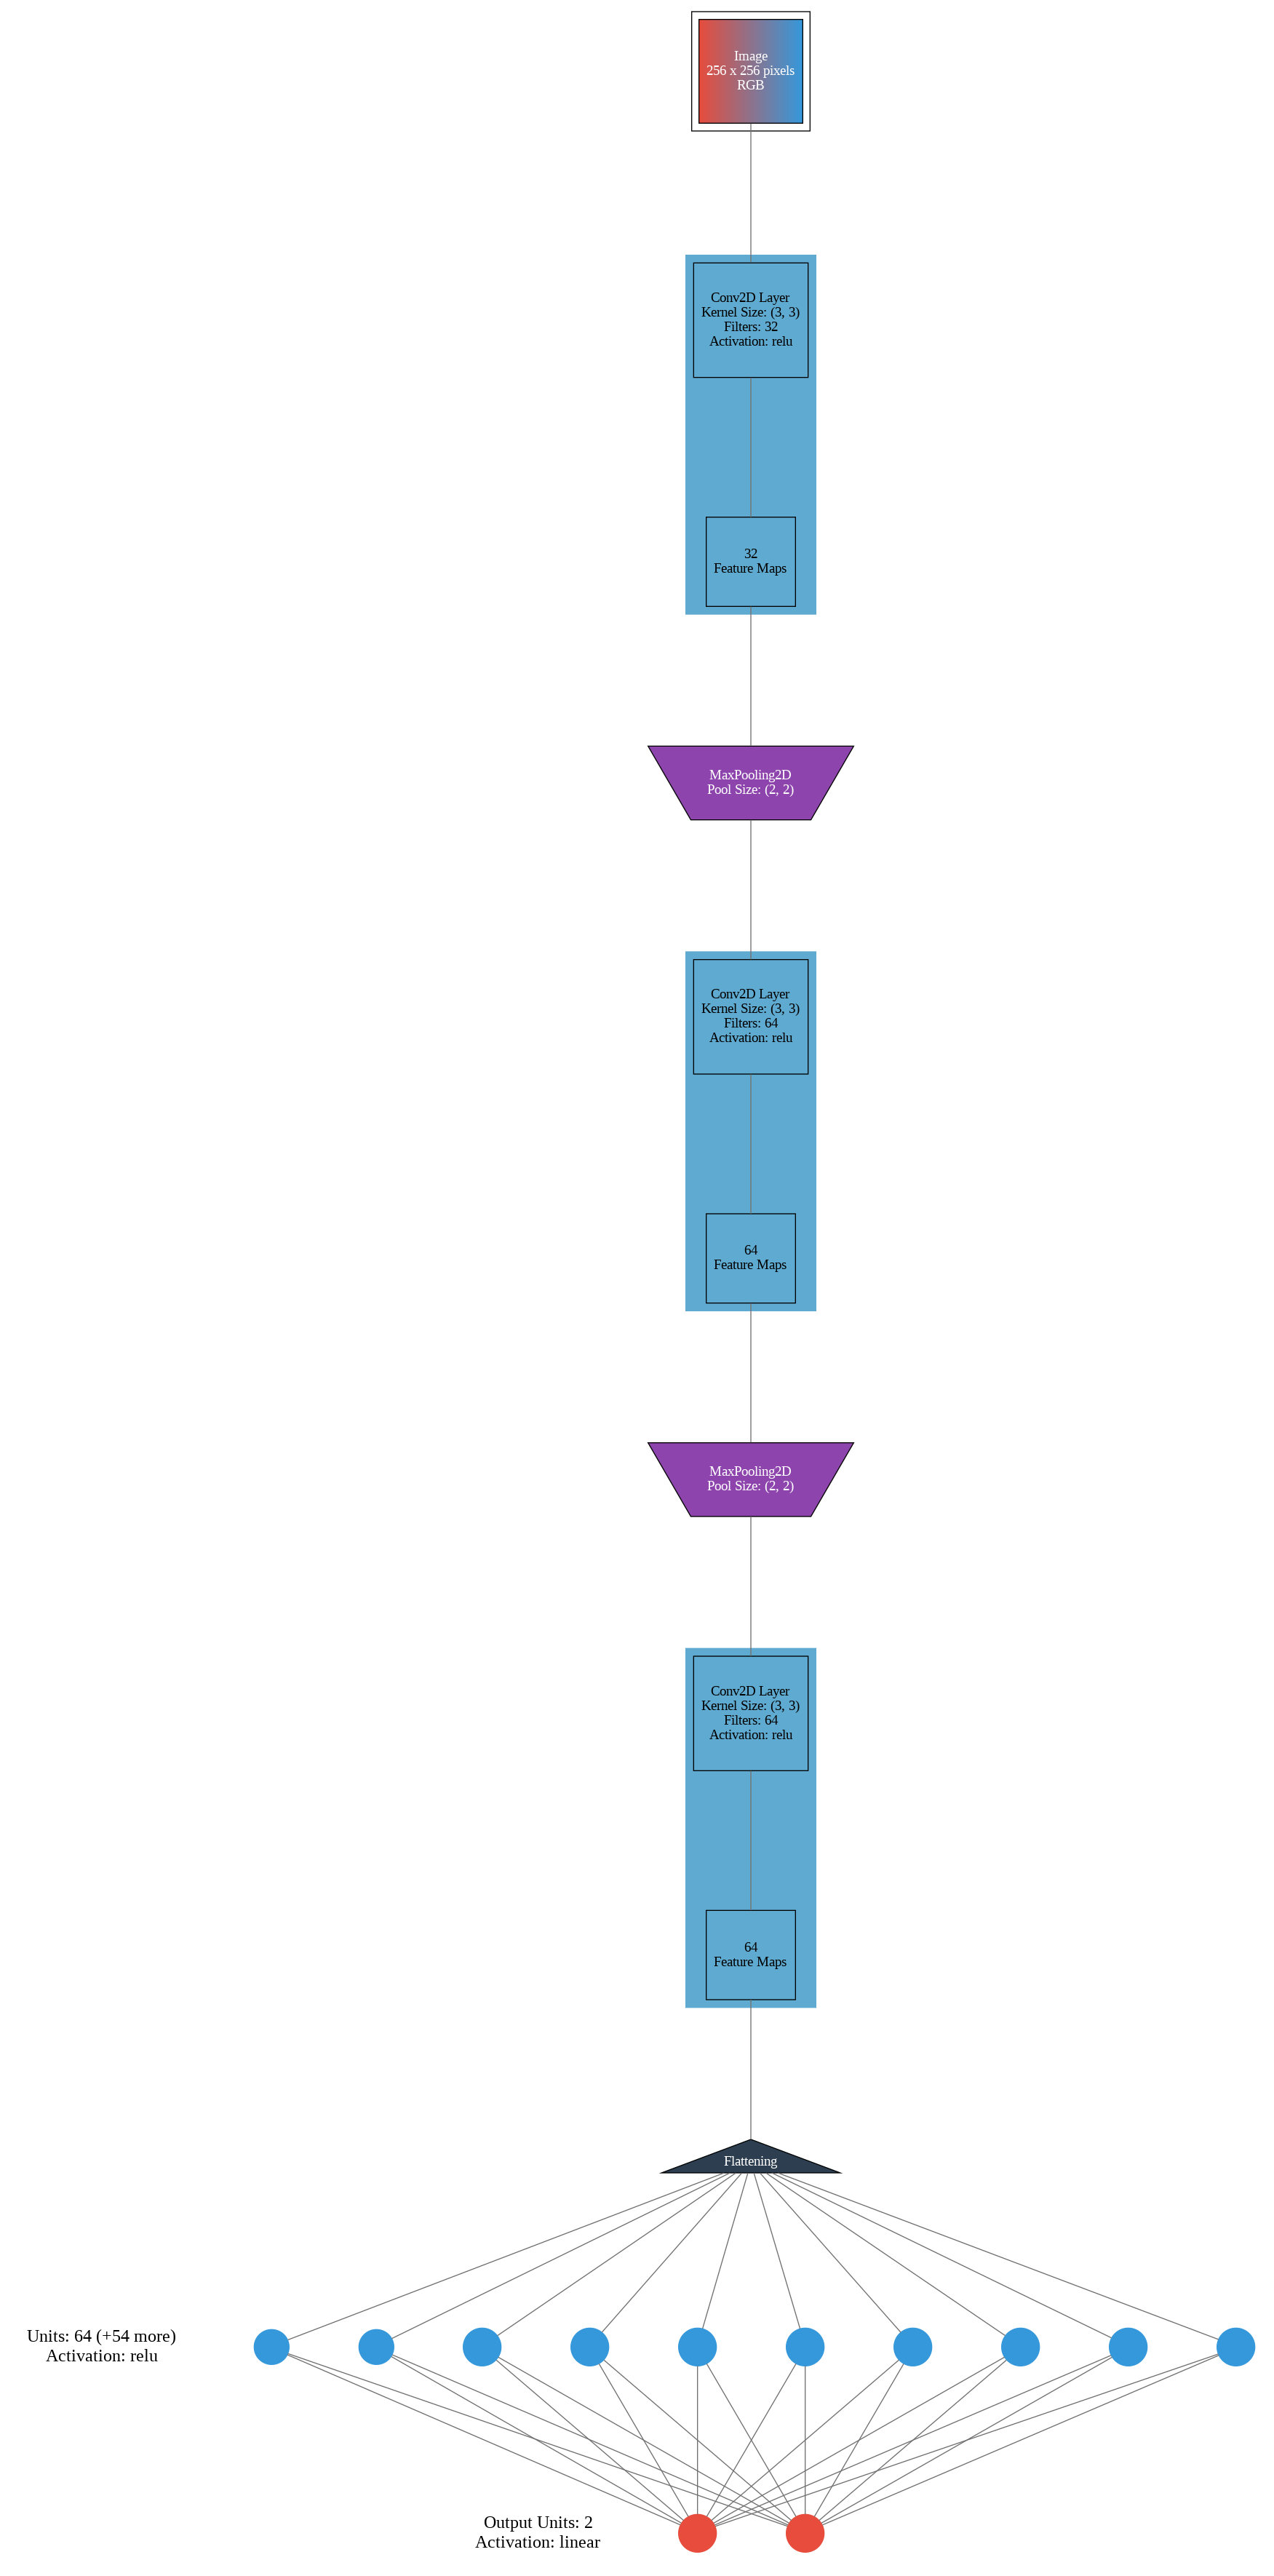

In [10]:
visualizer(model, file_format='png', view=True)
from PIL import Image
Image.open("graph.png")


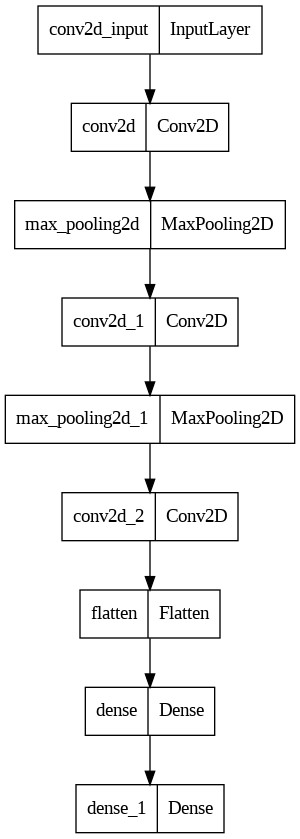

In [11]:
plot_model(model, to_file='model.png')

In [12]:
model.save("modeloChona.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
class_names = training.class_names
img_url = "/content/drive/MyDrive/tom_and_jerry/tom_and_jerry/tom/frame3597.jpg" #Imagen de Tom


img = tf.keras.utils.load_img(
    img_url, target_size=(256, 256)
)
img2 = tf.keras.utils.load_img(
    img2_url, target_size=(256, 256)
)

img_array = tf.keras.utils.img_to_array(img2)
img_array = tf.expand_dims(img_array, 0)
img_array2 = tf.keras.utils.img_to_array(img2)
img_array2 = tf.expand_dims(img_array2, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
predictions2 = model.predict(img_array2)
score2 = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
print(
    "This image of Gal, most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score2)], 100 * np.max(score))
)

1/1 [==============================] - 0s 84ms/step
This image most likely belongs to tom with a 100.00 percent confidence.
This image of Gal, most likely belongs to tom with a 100.00 percent confidence.


Datos de entrada: El tipo de dato de entrada son imagenes de una persona donde esta se va a ir "partiendo" en pixeles para reconocer sus rasgos en las diferentes capas y asi poder determinar a que persoanje se parece. La entrada para la persona va a ser la foto pero para el modelo van a ser los rasgos.\
Ejemplos del dataset: El dataset está compuesto por dos carpetas, una designada para cada personaje. Al personaje se lo ve en diferentes escenarios, con diferentes tipos de luces, desde diferentes ángulos, caras, etc. Esto sirve para poder reconocer las facciones del personaje sacando esos factores así no son un problema si por ejemplo; el ambiente donde se toma la fotografía de la persona no es muy iluminado ni el ángulo con la que se toma la foto. Con esto el modelo es capaz de clasificar a la persona en una categoria reduciendo las posibilidadades de error aún con una mala imagen de la persona. \
Datos de salida: Los dos datos de salida van a ser Tom y Jerry. A la persona se le va a determinar a que grupo partenece segun los rasgos de la persona y los rasgos tomados de las escenas desde distintos ángulos, como ya dijimos anteriormente. Las capas van a ir juntando los rasgos para cada vez ir acercandose a una categoria.


Algunos ejemplos de Jerry: 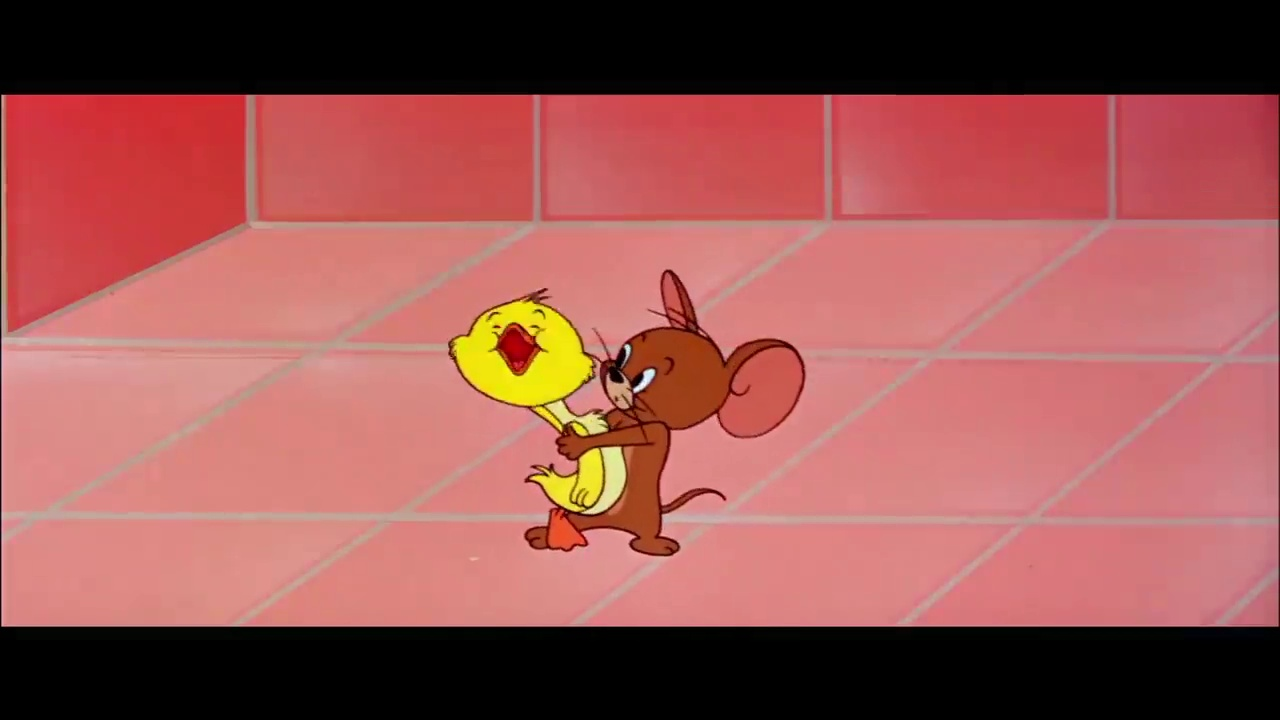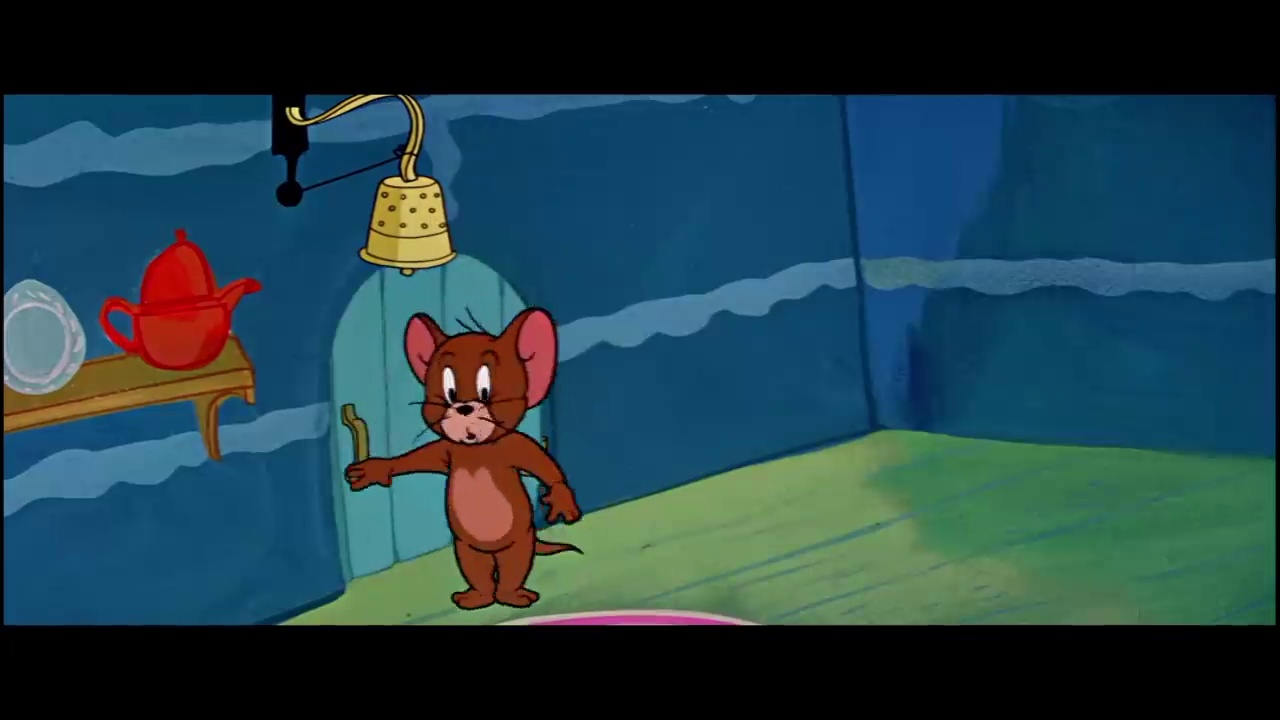

Algunos ejemplos de Tom: 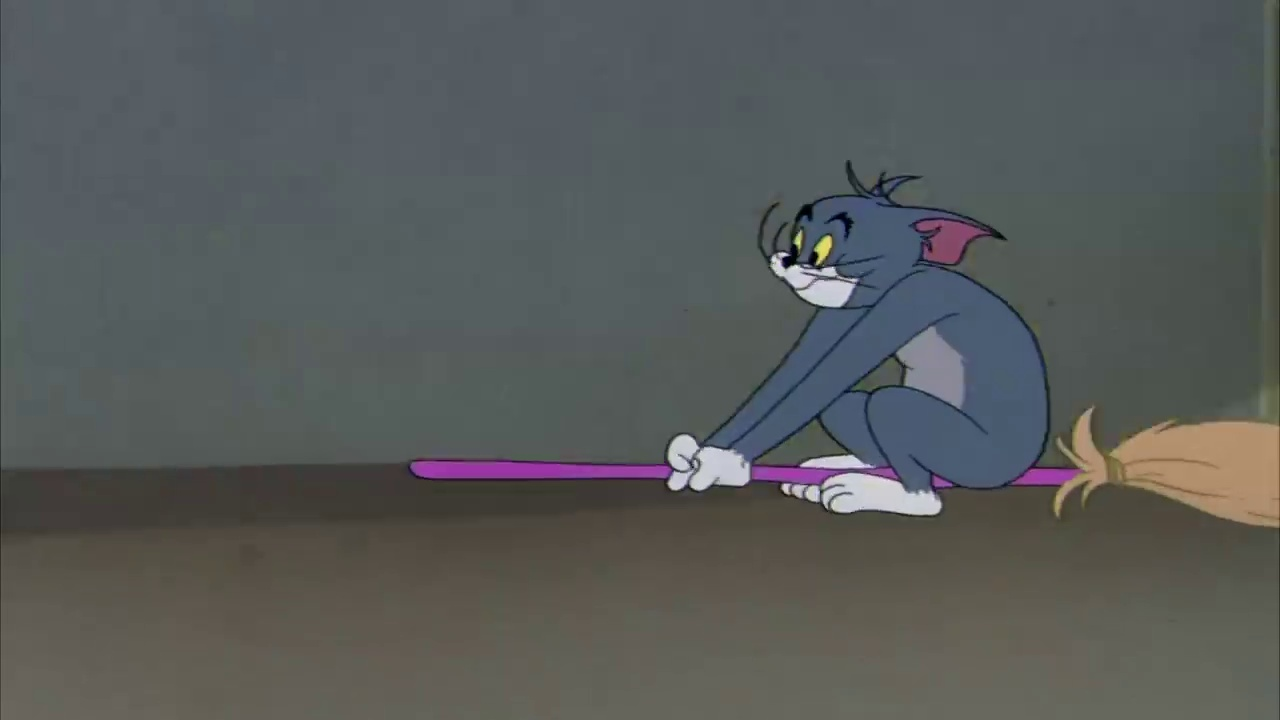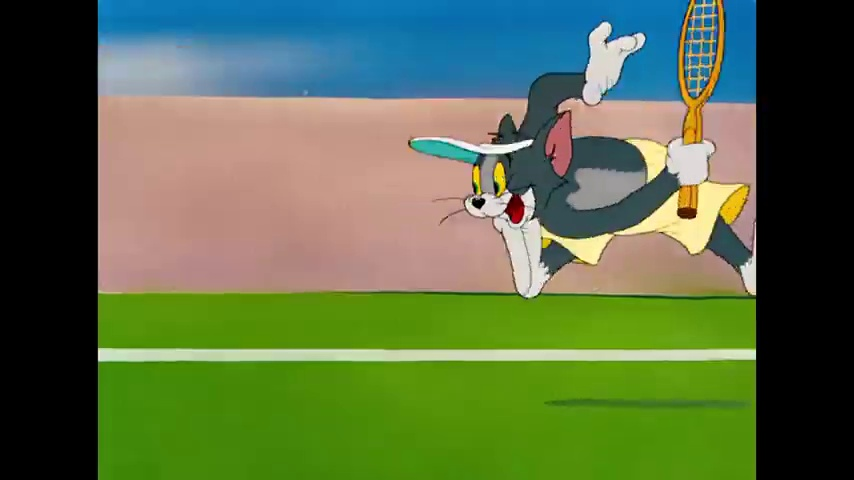